In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#Sets the plots to be displayed and saved in notebook
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
for year in range(2016,2022):
    if(year!=2020):
        df = pd.read_csv('../data/match-details/'+str(year)+'.csv')
        df = df[['Radiant_team_name','Dire_team_name','Radiant_score','Dire_score','Result']]
        Net_win_margin = {}
        team_names = list(np.unique([list(df['Radiant_team_name']),list(df['Dire_team_name'])]))
        try:
            team_names.remove('nan')
        except:
            pass
        
        for j in team_names:
            Net_score = 0
            df1 = df[df['Radiant_team_name'] == j]
            df1.reset_index(inplace=True,drop='index')
            for i in range(len(df1)):
                if(df1.loc[i,'Result']=='Radiant'):
                    Net_score+= df1.loc[i,'Radiant_score']
                else:
                    Net_score-= df1.loc[i,'Radiant_score']

            df2 = df[df['Dire_team_name'] == j]
            df2.reset_index(inplace=True,drop='index')
            for i in range(len(df2)):
                if(df2.loc[i,'Result']=='Dire'):
                    Net_score+= df2.loc[i,'Dire_score']
                else:
                    Net_score-= df2.loc[i,'Dire_score']
            Net_win_margin[j] = np.round(Net_score/(len(df1)+len(df2)),4)
        Net_win_margin = {a : b for a,b in sorted(Net_win_margin.items(), key=lambda item: item[1], reverse = True)}
        with open('../output/NWM_'+str(year)+'.csv','w', encoding='UTF-8') as f:
            write=csv.writer(f)
            for i,j in Net_win_margin.items():
                
                write.writerow([str(i),j])

In [3]:

team_names

['Alliance',
 'Elephant',
 'Evil Geniuses',
 'Fnatic',
 'INVICTUS GAMING',
 'OG',
 'PSG.LGD',
 'Quincy Crew',
 'SG esports',
 'T1',
 'Team Aster',
 'Team Secret',
 'Team Spirit',
 'Thunder Predator',
 'Undying',
 'Vici Gaming',
 'Virtus.pro',
 'beastcoast']

In [4]:
Net_win_margin = {}
for j in team_names:
    Net_score = 0
    df1 = df[df['Radiant_team_name'] == j]
    df1.reset_index(inplace=True,drop='index')
    for i in range(len(df1)):
        if(df1.loc[i,'Result']=='Radiant'):
            Net_score+= df1.loc[i,'Radiant_score']
        else:
            Net_score-= df1.loc[i,'Radiant_score']
    
    df2 = df[df['Dire_team_name'] == j]
    df2.reset_index(inplace=True,drop='index')
    for i in range(len(df2)):
        if(df2.loc[i,'Result']=='Dire'):
            Net_score+= df2.loc[i,'Dire_score']
        else:
            Net_score-= df2.loc[i,'Dire_score']
    Net_win_margin[j] = np.round(Net_score/(len(df1)+len(df2)),4)

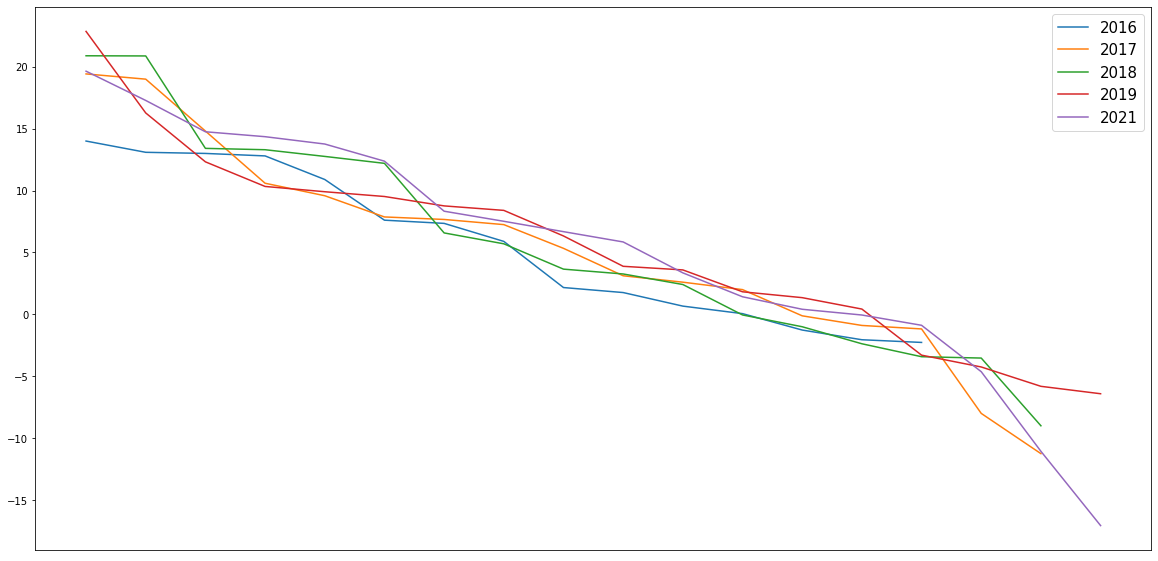

In [5]:
fig , ax = plt.subplots(1)

for i in range(2016,2022):
    if(i!=2020):
        df = pd.read_csv('NWM_'+str(i) + '.csv',header=None)
        ax.plot([i for i in range (len(df))],list(df[1]),label=i)
plt.legend(prop={'size':15})
plt.xticks([])
plt.show()